In [971]:
import random
import numpy as np
import matplotlib.pyplot as plt
import copy

In [972]:
N = 50 #number of genes
P = 50 #population size
G = 100 #number of generations
M = 0.03 #mutation rate

In [973]:
population = []
offspring = []

crossover = []
mutate = []


total_utilities = {
    "origonal": 0,
    "gladiator": 0,
    "crosspoint": 0,
    "mutate": 0
}


best_fitness = np.zeros(G)
average_fitness = np.zeros(G)


In [974]:
class individual:
    def __init__(self):
        self.gene = [0]*N
        self.fitness = 0 

In [975]:
def test_function( ind ):
    utility=0
    for i in range(N):
        utility = utility + ind.gene[i]
    return utility

In [976]:
def test_all(pop):
    total_utility = 0
    for i in pop:
        total_utility = total_utility + test_function(i)

    average_utility = total_utility/len(pop)
    
    return average_utility



In [977]:
def graph_population(pop, name):
    data = np.array([])
    
    for po in pop:
        data = np.append(data, po.fitness)


    plt.plot(data)
    plt.title(name)
    plt.xlabel("Individual")
    plt.ylabel("Fitness")
    plt.show()
    plt.close()

In [978]:
def graph_averages():
    height = np.array([])
    average = np.array([])
    
    for i in best_fitness:
        height = np.append(height, i)
    
    for i in average_fitness:
        average = np.append(average, i)


    plt.plot(height, label="Best")
    plt.plot(average, label="Average")
    plt.legend()
    plt.title("Generational Fitness")


    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()
    plt.close()

In [979]:
for x in range (0, P):
    tempgene=[]
    for y in range (0, N):
        tempgene.append( random.randint(0,1))
    newind = individual()
    newind.gene = tempgene.copy()
    population.append(newind)



In [980]:
def get_height(pop):
    height = 0
    for i in pop:
        if i.fitness > height:
            height = i.fitness

    return height

In [981]:
def test_population(population, name):
    for pop in population:
        pop.fitness = test_function(pop)
        total_utilities[name] = total_utilities[name] + pop.fitness

Generation  0
Best fitness:  0.0
Average fitness:  0.0
Total utilities:  {'origonal': 1267, 'gladiator': 1383, 'crosspoint': 1383, 'mutate': 1356}
Mutate wins
Generation  1
Best fitness:  36.0
Average fitness:  27.12
Total utilities:  {'origonal': 1356, 'gladiator': 1493, 'crosspoint': 1493, 'mutate': 1460}
Mutate wins
Generation  2
Best fitness:  38.0
Average fitness:  29.2
Total utilities:  {'origonal': 1460, 'gladiator': 1565, 'crosspoint': 1565, 'mutate': 1548}
Mutate wins
Generation  3
Best fitness:  37.0
Average fitness:  30.96
Total utilities:  {'origonal': 1548, 'gladiator': 1630, 'crosspoint': 1630, 'mutate': 1591}
Mutate wins
Generation  4
Best fitness:  37.0
Average fitness:  31.82
Total utilities:  {'origonal': 1591, 'gladiator': 1673, 'crosspoint': 1673, 'mutate': 1639}
Mutate wins
Generation  5
Best fitness:  40.0
Average fitness:  32.78
Total utilities:  {'origonal': 1639, 'gladiator': 1719, 'crosspoint': 1719, 'mutate': 1687}
Mutate wins
Generation  6
Best fitness:  39.

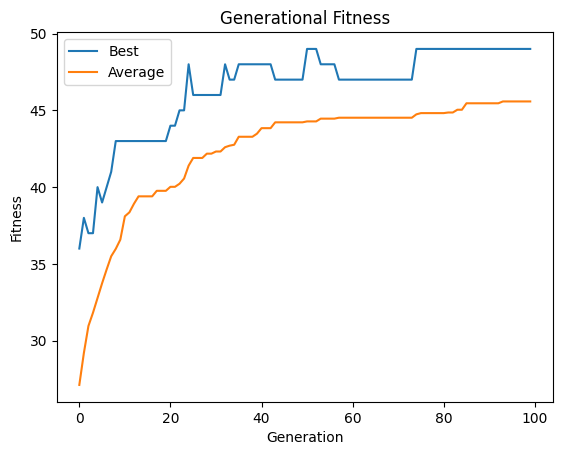

In [982]:
for g in range (0, G):



    print("Generation ", g)

## Test origonal population

    test_population(population, "origonal")
    
    
    
        # print(pop.gene, " ", pop.fitness)



## init gladiator population
    
    for i in range (0, P):
        parent1 = random.randint( 0, P-1 )
        off1 = copy.deepcopy(population[parent1])
        parent2 = random.randint( 0, P-1 )
        off2 = copy.deepcopy(population[parent2])
        if off1.fitness > off2.fitness:
            offspring.append( off1 )
        else:
            offspring.append( off2 )

    ## test gladiator population
    
    test_population(offspring, "gladiator")



## create new copies to allow for easy transfer of data

    crossover = copy.deepcopy(offspring) 
    # mutate = copy.deepcopy(offspring)

## init crossover population

    toff1 = individual()
    toff2 = individual()
    temp = individual()
    for i in range( 0, P, 2 ):
        toff1 = copy.deepcopy(crossover[i])
        toff2 = copy.deepcopy(crossover[i+1])
        temp = copy.deepcopy(crossover[i])
        crosspoint = random.randint(1,N)

        for j in range (crosspoint, N):
            toff1.gene[j] = toff2.gene[j]
            toff2.gene[j] = temp.gene[j]
            
        crossover[i] = copy.deepcopy(toff1)
        crossover[i+1] = copy.deepcopy(toff2)

    ## test crossover population

    test_population(crossover, "crosspoint")




## init mutate population

    for i in range( 0, P ):
        newind = individual()
        newind.gene = []
        for j in range( 0, N ):
            gene = crossover[i].gene[j]
            mutprob = random.random()
            # print("muteprob: ", mutprob)
            if mutprob < M:
                if( gene == 1):
                    gene = 0
                else:
                    gene = 1
            newind.gene.append(gene)
            
        mutate.append(newind)

    ## test mutate population

    test_population(mutate, "mutate")

    







    # graph_population(population, "Origonal")
    # graph_population(offspring, "Offspring Gladiator")
    # graph_population(crossover, "Offspring Crossover")
    # graph_population(mutate, "Offspring Mutation")

    print("Best fitness: ", best_fitness[g-1])
    print("Average fitness: ", average_fitness[g-1])
    print("Total utilities: ", total_utilities)

## copy most fit population to next generation


    # if (total_utilities["gladiator"] > total_utilities["crosspoint"]):
    #     if (total_utilities["gladiator"] > total_utilities["mutate"]):

    #         if (total_utilities["origonal"] > total_utilities["gladiator"]):
    #             population = copy.deepcopy(population)
    #             print("Origonal wins")
    #         else:
    #             population = copy.deepcopy(offspring)
    #             print("Gladiator wins")
    #     else:

    #         if (total_utilities["origonal"] > total_utilities["mutate"]):
    #             population = copy.deepcopy(population)
    #             print("Origonal wins")
    #         else:
    #             population = copy.deepcopy(mutate)
    #             print("Mutate wins")
    # else:
    #     if (total_utilities["crosspoint"] > total_utilities["mutate"]):
    #         if(total_utilities["origonal"] > total_utilities["crosspoint"]):
    #             population = copy.deepcopy(population)
    #             print("Origonal wins")
    #         else:
    #             population = copy.deepcopy(crossover)
    #             print("Crossover wins")
    #     else:
    #         if(total_utilities["origonal"] > total_utilities["mutate"]):
    #             population = copy.deepcopy(population)
    #             print("Origonal wins")
    #         else:
    #             population = copy.deepcopy(mutate)
    #             print("Mutate wins")



    if (total_utilities["mutate"] > total_utilities["origonal"]):
        population = copy.deepcopy(mutate)
        print("Mutate wins")
 


    ## calculate average fitness
    best_fitness[g] = get_height(population)
    average_fitness[g] = test_all(population)

    ## reset total utilities

    total_utilities = {
        "origonal": 0,
        "gladiator": 0,
        "crosspoint": 0,
        "mutate": 0
    }

    ## reset populations

    offspring = []
    crossover = []
    mutate = []



## graph average fitness

graph_averages()
    
